<a href="https://colab.research.google.com/github/Coding-Devil/Data-visualization-2/blob/main/DVA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

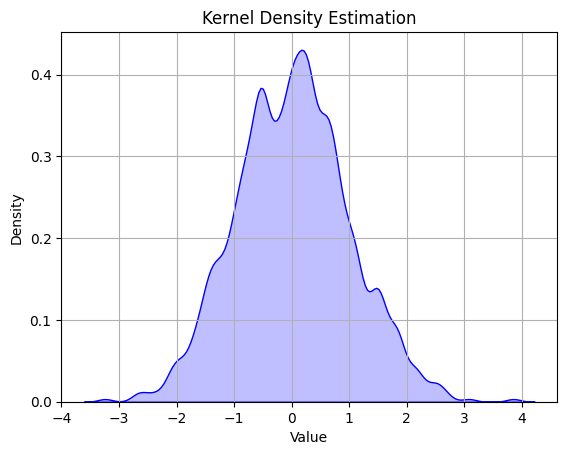

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate random data
np.random.seed(42)
data = np.random.normal(loc=0, scale=1, size=1000)  # Normal distribution

# Create a KDE plot
sns.kdeplot(data, fill=True, color="blue", bw_adjust=0.5)
plt.title("Kernel Density Estimation")
plt.xlabel("Value")
plt.ylabel("Density")
plt.grid(True)
plt.show()


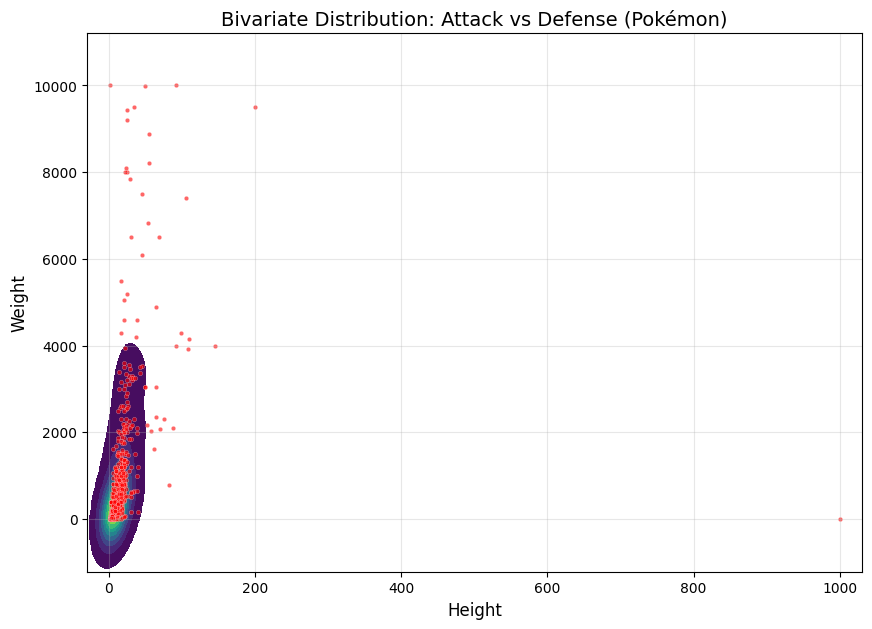

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Pokémon dataset (open source)
url = "https://raw.githubusercontent.com/veekun/pokedex/master/pokedex/data/csv/pokemon.csv"
pokemon = pd.read_csv(url)

# Select relevant columns for visualization
pokemon = pokemon[["identifier", "height", "weight"]].dropna()

# Plot a bivariate KDE distribution for Attack vs Defense
plt.figure(figsize=(10, 7))
sns.kdeplot(
    data=pokemon,
    x="height",
    y="weight",
    cmap="viridis",
    fill=True,
    thresh=0.05
)

# Add a scatter plot for better visualization of points
sns.scatterplot(
    data=pokemon,
    x="height",
    y="weight",
    color="red",
    alpha=0.6,
    s=10
)

# Add titles and labels
plt.title("Bivariate Distribution: Attack vs Defense (Pokémon)", fontsize=14)
plt.xlabel("Height", fontsize=12)
plt.ylabel("Weight", fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()


In [8]:
!pip install osmnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.4/99.4 kB 1.9 MB/s eta 0:00:00


In [21]:
# Import necessary libraries
import pandas as pd
from bokeh.io import output_notebook, show
from bokeh.models import ColumnDataSource, HoverTool, ColorBar
from bokeh.plotting import figure
from bokeh.transform import linear_cmap
from bokeh.palettes import Viridis256
import numpy as np

# Enable inline plotting in Jupyter Notebook
output_notebook()

# Sample data: Create a simple DataFrame with geographical coordinates and values
data = {
    'name': ['Location A', 'Location B', 'Location C', 'Location D'],
    'latitude': [37.7749, 34.0522, 40.7128, 41.8781],
    'longitude': [-122.4194, -118.2437, -74.0060, -87.6298],
    'value': [10, 20, 30, 40]  # Example values for color mapping
}

# Create a DataFrame
df = pd.DataFrame(data)

# Convert latitude and longitude to Web Mercator coordinates
df['x'] = df['longitude'] * 20037508.34 / 180
df['y'] = np.log(np.tan((90 + df['latitude']) * np.pi / 360)) / (np.pi / 180)
df['y'] = df['y'] * 20037508.34 / 180

# Create a ColumnDataSource
source = ColumnDataSource(df)

# Create a figure
p = figure(title="Interactive Geospatial Data Visualization",
           tools="pan,wheel_zoom,box_zoom,reset,hover",
           x_axis_label='Longitude', y_axis_label='Latitude')

# Define color mapping
mapper = linear_cmap(field_name='value', palette=Viridis256, low=df['value'].min(), high=df['value'].max())

# Add scatter points to the figure
p.scatter(x='x', y='y', size=10, source=source, fill_color=mapper, line_color='black', line_width=0.5)

# Add hover tool
hover = p.select(dict(type=HoverTool))
hover.tooltips = [("Name", "@name"), ("Value", "@value")]

# Add color bar
color_bar = ColorBar(color_mapper=mapper['transform'], width=8, location=(0,0))
p.add_layout(color_bar, 'right')

# Show the plot
show(p)

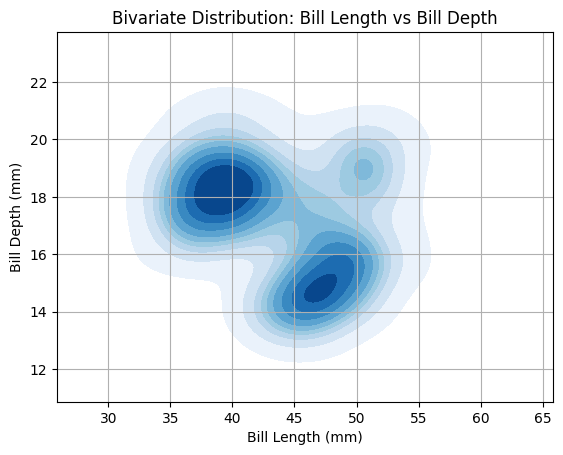

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the penguins dataset
penguins = sns.load_dataset("penguins")

# Drop rows with missing values
penguins = penguins.dropna()

# Plot a bivariate distribution (bill length vs bill depth)
sns.kdeplot(
    data=penguins,
    x="bill_length_mm",
    y="bill_depth_mm",
    cmap="Blues",
    fill=True,
    thresh=0.05
)

# Add titles and labels
plt.title("Bivariate Distribution: Bill Length vs Bill Depth")
plt.xlabel("Bill Length (mm)")
plt.ylabel("Bill Depth (mm)")
plt.grid(True)
plt.show()


In [22]:
# Import necessary libraries
import pandas as pd
from bokeh.io import output_notebook, show
from bokeh.models import ColumnDataSource, HoverTool, GraphRenderer, StaticLayoutProvider, Circle, MultiLine
from bokeh.plotting import figure
from bokeh.transform import linear_cmap
from bokeh.palettes import Viridis256
import numpy as np

# Enable inline plotting in Jupyter Notebook
output_notebook()

# Sample data: Create a DataFrame with geographical coordinates for nodes
nodes_data = {
    'name': ['Location A', 'Location B', 'Location C', 'Location D'],
    'latitude': [37.7749, 34.0522, 40.7128, 41.8781],
    'longitude': [-122.4194, -118.2437, -74.0060, -87.6298],
}

# Create a DataFrame for nodes
nodes_df = pd.DataFrame(nodes_data)

# Convert latitude and longitude to Web Mercator coordinates
nodes_df['x'] = nodes_df['longitude'] * 20037508.34 / 180
nodes_df['y'] = np.log(np.tan((90 + nodes_df['latitude']) * np.pi / 360)) / (np.pi / 180)
nodes_df['y'] = nodes_df['y'] * 20037508.34 / 180

# Sample edges data: Define connections between nodes
edges_data = {
    'start': [0, 0, 1, 2],  # Indices of start nodes
    'end': [1, 2, 3, 3]     # Indices of end nodes
}

# Create a DataFrame for edges
edges_df = pd.DataFrame(edges_data)

# Create a ColumnDataSource for nodes
node_source = ColumnDataSource(nodes_df)

# Create a ColumnDataSource for edges
edge_source = ColumnDataSource(edges_df)

# Create a figure
p = figure(title="Geospatial Network Visualization",
           tools="pan,wheel_zoom,box_zoom,reset,hover",
           x_axis_label='Longitude', y_axis_label='Latitude')

# Add nodes to the plot
p.circle(x='x', y='y', size=10, source=node_source, fill_color='blue', line_color='black', line_width=1)

# Add edges to the plot
for index, row in edges_df.iterrows():
    start_node = nodes_df.iloc[row['start']]
    end_node = nodes_df.iloc[row['end']]
    p.line(x=[start_node['x'], end_node['x']],
            y=[start_node['y'], end_node['y']],
            line_width=2, line_color='gray')

# Add hover tool for nodes
hover = p.select(dict(type=HoverTool))
hover.tooltips = [("Name", "@name")]

# Show the plot
show(p)

In [23]:
!pip install requests beautifulsoup4 pillow

In [26]:
import requests
from bs4 import BeautifulSoup
from PIL import Image
from io import BytesIO
import random

# Function to retrieve an image from a URL
def retrieve_image(image_url):
    try:
        response = requests.get(image_url)
        response.raise_for_status()  # Raise an error for bad responses
        image = Image.open(BytesIO(response.content))
        return image
    except Exception as e:
        print(f"Error retrieving image: {e}")
        return None

# Function to scrape quotes from a webpage
def scrape_quotes(url):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an error for bad responses
        soup = BeautifulSoup(response.text, 'html.parser')

        # Extract all quotes
        quotes = []
        for quote in soup.find_all('span', class_='text'):
            quotes.append(quote.text)

        return quotes
    except Exception as e:
        print(f"Error scraping quotes: {e}")
        return []

# Main function to demonstrate the functionality
def main():
    # URL of the webpage to scrape (replace with a real webpage URL)
    webpage_url = 'https://quotes.toscrape.com'  # A website for scraping quotes
    quotes = scrape_quotes(webpage_url)

    # Print the extracted quotes
    print("Extracted Quotes:")
    for quote in quotes[:5]:  # Show top 5 quotes
        print(f"'{quote}'")

    # URL of an image to retrieve (random placeholder image for illustration)
    image_urls = [
        'https://via.placeholder.com/150/0000FF/808080?Text=Inspirational+Image+1',
        'https://via.placeholder.com/150/FF0000/FFFFFF?Text=Inspirational+Image+2',
        'https://via.placeholder.com/150/FFFF00/000000?Text=Inspirational+Image+3'
    ]
    random_image_url = random.choice(image_urls)  # Pick a random image URL
    image = retrieve_image(random_image_url)

    # Display the image if retrieved successfully
    if image:
        image.show()

if __name__ == "__main__":
    main()


Extracted Quotes:
'“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”'
'“It is our choices, Harry, that show what we truly are, far more than our abilities.”'
'“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”'
'“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”'
'“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”'


In [32]:
!pip install zeep

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 3.7 MB/s eta 0:00:00


In [37]:
import xml.etree.ElementTree as ET

# Simple XML-based "database" of book information
book_database = {
    "1": {"title": "Harry Potter", "author": "J.K. Rowling", "year": "1997"},
    "2": {"title": "Lord of the Rings", "author": "J.R.R. Tolkien", "year": "1954"},
    "3": {"title": "The Hobbit", "author": "J.R.R. Tolkien", "year": "1937"}
}

class BookWebService:
    def get_book_by_id(self, book_id):
        """
        Retrieve book information and return as XML
        """
        book = book_database.get(book_id)

        if not book:
            # Create XML for error response
            root = ET.Element('book-response')
            error = ET.SubElement(root, 'error')
            error.text = f"No book found with ID {book_id}"
            return ET.tostring(root, encoding='unicode')

        # Create XML response
        root = ET.Element('book-response')
        book_elem = ET.SubElement(root, 'book')

        # Add book details to XML
        for key, value in book.items():
            elem = ET.SubElement(book_elem, key)
            elem.text = value

        # Convert XML to string
        return ET.tostring(root, encoding='unicode')

def main():
    # Create web service instance
    book_service = BookWebService()

    # Demonstrate XML service calls
    print("Book 1 XML Response:")
    print(book_service.get_book_by_id("1"))

    print("\nBook 4 XML Response (Non-existent):")
    print(book_service.get_book_by_id("3"))

if __name__ == "__main__":
    main()

Book 1 XML Response:
<book-response><book><title>Harry Potter</title><author>J.K. Rowling</author><year>1997</year></book></book-response>

Book 4 XML Response (Non-existent):
<book-response><book><title>The Hobbit</title><author>J.R.R. Tolkien</author><year>1937</year></book></book-response>
